# Demo for morpc.plot

## Plot from Resource

Plot a graph or chart from a frictionless resource based on schema and data types. 

In [5]:
import morpc
import pandas as pd
import numpy as np
import random

## Build a sample resource file.

In [6]:
df = pd.DataFrame({"column1": [x for x in np.random.binomial(2000, .1, 100)],
              "column2": [x for x in np.random.exponential(2,100)],
              "color": [random.choice(['a','b','c','d']) for n in range(100)]
              })

In [7]:
df.to_csv('./temp_data/plot_df.csv', index=False)

In [8]:
morpc.frictionless.create_resource('plot_df.csv', 
                                   resourcePath='./temp_data/plot_df.resource.yaml',
                                   schemaPath='plot_df.schema.yaml',
                                   writeResource=True
                                   )

morpc.create_resource | INFO | Format not specified. Using format derived from data file extension: csv
morpc.create_resource | INFO | Title not specified. Using placeholder value derived from data filename: plot_df
morpc.create_resource | INFO | Name not specified. Using placeholder value derived from data filename: plot_df
morpc.create_resource | INFO | Description not specified. Using boilerplate placeholder value: This dataset was produced by MORPC. For more information, please contact dataandmaps@morpc.org.
morpc.create_resource | INFO | Writing Frictionless Resource file to temp_data\plot_df.resource.yaml


{'name': 'plot_df',
 'type': 'table',
 'title': 'plot_df',
 'description': 'This dataset was produced by MORPC. For more information, '
                'please contact dataandmaps@morpc.org.',
 'profile': 'data-resource',
 'path': 'plot_df.csv',
 'scheme': 'file',
 'format': 'csv',
 'mediatype': 'text/csv',
 'hash': '06fd27dd76f8873462f06de56d0892bf',
 'bytes': 2613,
 'schema': 'plot_df.schema.yaml'}

In [9]:
df, resource, schema = morpc.frictionless.load_data('./temp_data/plot_df.resource.yaml')

morpc.load_data | INFO | Loading Frictionless Resource file at location temp_data\plot_df.resource.yaml
morpc.load_data | INFO | Loading data, resource file, and schema from their source locations
morpc.load_data | INFO | --> Data file: temp_data\plot_df.csv
morpc.load_data | INFO | --> Resource file: temp_data\plot_df.resource.yaml
morpc.load_data | INFO | --> Schema file: temp_data\plot_df.schema.yaml
morpc.load_data | INFO | Loading data.
cast_field_types | INFO | Casting field column1 as type integer.
cast_field_types | INFO | Casting field column2 as type number.
cast_field_types | INFO | Casting field color as type string.


In [10]:
import morpc
plot = morpc.plot.from_resource('./temp_data/plot_df.resource.yaml', x='column1', y='column2', group='color').point()

morpc.load_data | INFO | Loading Frictionless Resource file at location temp_data\plot_df.resource.yaml
morpc.load_data | INFO | Loading data, resource file, and schema from their source locations
morpc.load_data | INFO | --> Data file: temp_data\plot_df.csv
morpc.load_data | INFO | --> Resource file: temp_data\plot_df.resource.yaml
morpc.load_data | INFO | --> Schema file: temp_data\plot_df.schema.yaml
morpc.load_data | INFO | Loading data.


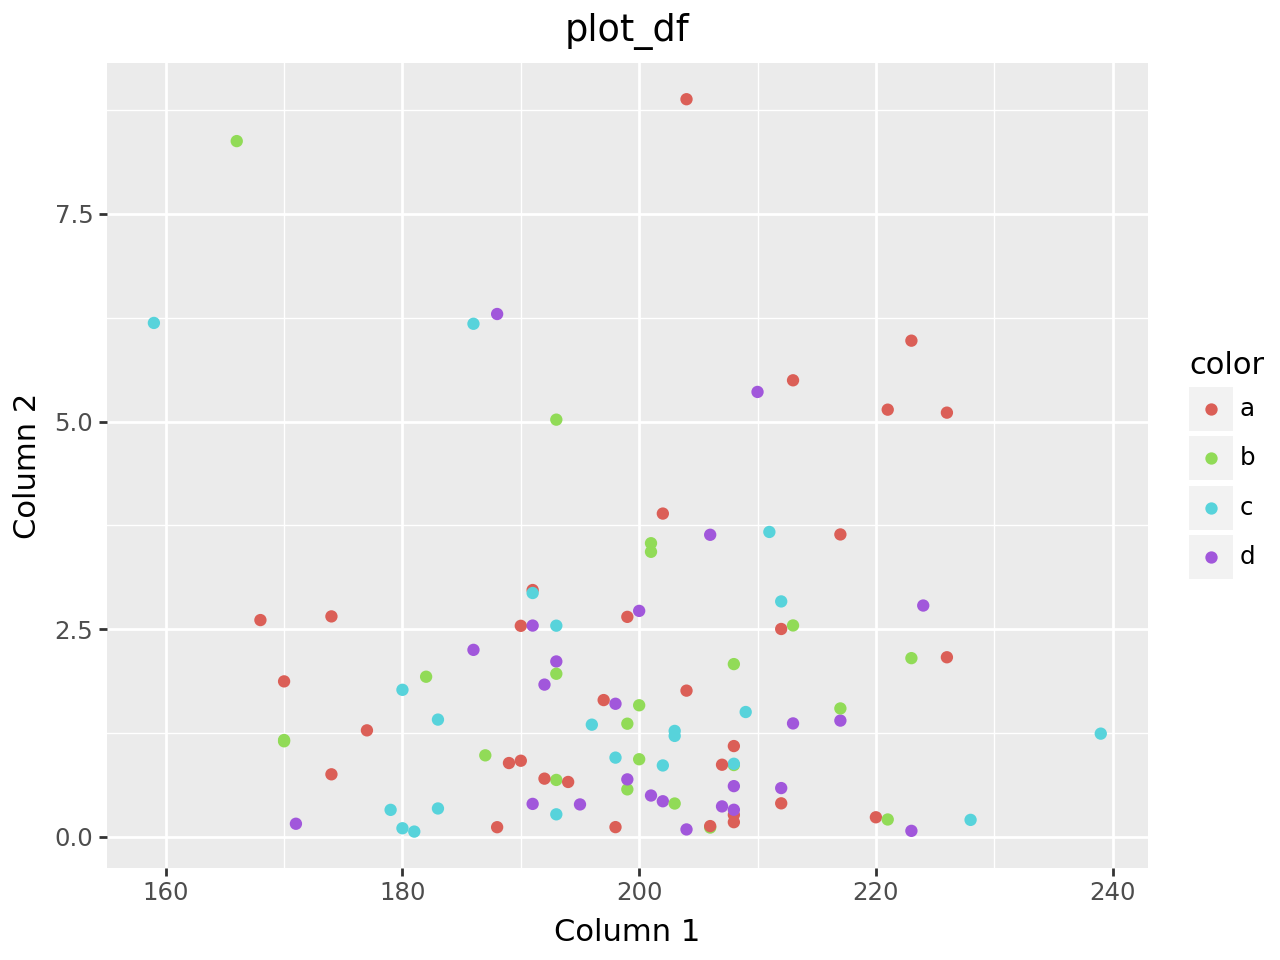

In [13]:
plot.show()